## Lab 21 | Time Series: Models Evaluation and Comparison

Download data

In [2]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

# Setup
import warnings
warnings.filterwarnings("ignore")

# Download the datafile from yfinance
data = yf.download("BTC-USD")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [3]:
data.shape

(2701, 1)

In [4]:
data.tail()

,Close
Date,
2022-02-03,37154.601562
2022-02-04,41500.875000
2022-02-05,41441.164062
2022-02-06,42412.433594
2022-02-07,42664.148438


Invesitgate Data - Draw the graphs 

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'Bitcoin price')

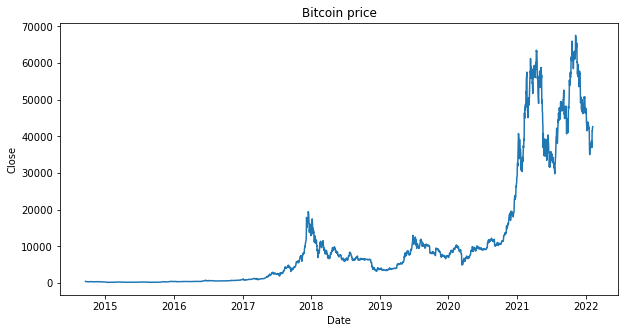

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.Close)
plt.title('Bitcoin price')

Check for stationary

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -1.04
5% Critical Value: -2.86
p-value: 0.74


In [8]:
#Since the p-value is above 0.05 I cananot reject the null hypothesis. Thus the data is not stationary, which can be also clearly seen on the chart above.
#I will also use the second test to check the stationarity of the data.

from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(5.561627139362372, 0.01, 28, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 5.56
5% Critical Value: 0.46
p-value: 0.01


C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [9]:
'''
In the case of second test the final result is the same. The p-value is less than 0.05 so in thsi case I need to reject the null hypothesis and assume that the data is not stationary.'''

'\nIn the case of second test the final result is the same. The p-value is less than 0.05 so in thsi case I need to reject the null hypothesis and assume that the data is not stationary.'

Autocorrelation

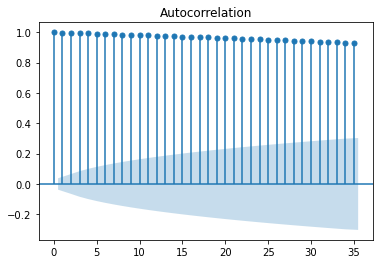

In [10]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data.Close)
plt.show()

Partial autocorrelation

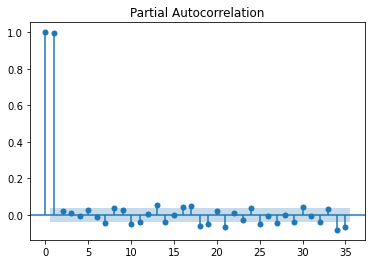

In [11]:
plot_pacf(data.Close)
plt.show()

In [12]:
'''
From the graphs above I can see that the data is autocorrelated, at least for first 35 logs.
'''

'\nFrom the graphs above I can see that the data is autocorrelated, at least for first 35 logs.\n'

Making data stationary

In [13]:
#First I will use diff method and invesitgate if it made data stationary
data['differ'] = data['Close'].diff()


In [14]:
data.head()

,Close,differ
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977


Text(0.5, 1.0, 'Bitcoin price')

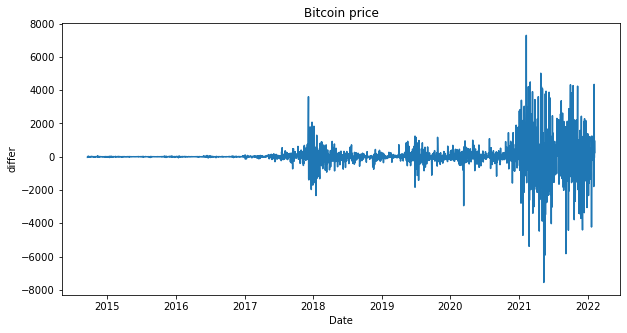

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.differ)
plt.title('Bitcoin price')

In [16]:
#Test
result = adfuller(data.differ.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -8.54
5% Critical Value: -2.86
p-value: 0.00


In [17]:
'''
Now the p-value is less than 0.05 which allows me to reject the H0 hypothesis (H0: time series is not stationary) and I can ssume taht the data is stationary.
'''

'\nNow the p-value is less than 0.05 which allows me to reject the H0 hypothesis (H0: time series is not stationary) and I can ssume taht the data is stationary.\n'

Implementation of AR model

In [18]:
'''By looking at the partial autocorrelation I can see that the model should be of the first order'''
from statsmodels.tsa.arima_model import ARMA
mod_ar1 = ARMA(data.differ.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2700
Model:                     ARMA(1, 0)   Log Likelihood              -21775.745
Method:                       css-mle   S.D. of innovations            769.816
Date:                Mon, 07 Feb 2022   AIC                          43557.490
Time:                        12:19:48   BIC                          43575.193
Sample:                    09-18-2014   HQIC                         43563.892
                         - 02-07-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.6322     14.442      1.082      0.279     -12.673      43.937
ar.L1.differ    -0.0259      0.019     -1.345      0.179      -0.064       0.012
                                    Roots   

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [19]:
mod_ar2 = ARMA(data.differ.dropna(), order=(10, 0))
res_ar2 = mod_ar2.fit()
print(res_ar2.summary())

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2700
Model:                    ARMA(10, 0)   Log Likelihood              -21755.315
Method:                       css-mle   S.D. of innovations            763.997
Date:                Mon, 07 Feb 2022   AIC                          43534.630
Time:                        12:19:51   BIC                          43605.442
Sample:                    09-18-2014   HQIC                         43560.238
                         - 02-07-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.6322     16.613      0.941      0.347     -16.929      48.193
ar.L1.differ     -0.0301      0.019     -1.569      0.117      -0.068       0.008
ar.L2.differ      0.0075      0.019     

MA model

In [20]:
mod_ma1 = ARMA(data.differ.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2700
Model:                     ARMA(0, 1)   Log Likelihood              -21775.748
Method:                       css-mle   S.D. of innovations            769.817
Date:                Mon, 07 Feb 2022   AIC                          43557.496
Time:                        12:19:53   BIC                          43575.199
Sample:                    09-18-2014   HQIC                         43563.898
                         - 02-07-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.6322     14.433      1.083      0.279     -12.657      43.921
ma.L1.differ    -0.0258      0.019     -1.344      0.179      -0.063       0.012
                                    Roots   

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [21]:
mod_ma2 = ARMA(data.differ.dropna(), order=(0, 10))
res_ma2 = mod_ma2.fit()
print(res_ma2.summary())

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2700
Model:                    ARMA(0, 10)   Log Likelihood              -21752.971
Method:                       css-mle   S.D. of innovations            763.329
Date:                Mon, 07 Feb 2022   AIC                          43529.943
Time:                        12:19:56   BIC                          43600.755
Sample:                    09-18-2014   HQIC                         43555.551
                         - 02-07-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.8656     16.819      0.943      0.346     -17.100      48.831
ma.L1.differ     -0.0295      0.019     -1.540      0.124      -0.067       0.008
ma.L2.differ      0.0163      0.019     

In [22]:
'''
From the cells above I can see that for both models MA and AR the order 1 is enought as the values of AIC and BIC for models of order 1 and 10 are almost the same. Thus for further comparison I will use these 2 models of order 1 and I will rerun them for train and test to compare them using errors.
'''

'\nFrom the cells above I can see that for both models MA and AR the order 1 is enought as the values of AIC and BIC for models of order 1 and 10 are almost the same. Thus for further comparison I will use these 2 models of order 1 and I will rerun them for train and test to compare them using errors.\n'

Comparison of models by predictions 

In [23]:
# I devide the data like 80% train 20% test:

train = data['differ'][0:int(len(data.differ)*0.8)]
test = data['differ'][int(len(data.differ)*0.8):]
print(len(train))
print(len(test))

2160
541


In [24]:
test.head()

Date
2020-08-16     27.105469
2020-08-17    361.598633
2020-08-18   -263.168945
2020-08-19   -232.950195
2020-08-20    120.088867
Name: differ, dtype: float64

In [25]:
#AR modle for train
mod_ar1 = ARMA(train.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2159
Model:                     ARMA(1, 0)   Log Likelihood              -15267.854
Method:                       css-mle   S.D. of innovations            285.085
Date:                Mon, 07 Feb 2022   AIC                          30541.708
Time:                        12:19:57   BIC                          30558.740
Sample:                    09-18-2014   HQIC                         30547.938
                         - 08-15-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2841      6.238      0.847      0.397      -6.942      17.510
ar.L1.differ     0.0164      0.022      0.764      0.445      -0.026       0.059
                                    Roots   

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [26]:
predictions_ar1 = res_ar1.predict(test.index[0],test.index[-1])

In [27]:
#Comparison of predictions and test
from statsmodels.tools.eval_measures import rmse
rmse_ar1 = rmse(test,predictions_ar1)
rmse_ar1

1623.4830801084054

In [28]:
#MA model for train
mod_ma1 = ARMA(train.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2159
Model:                     ARMA(0, 1)   Log Likelihood              -15267.849
Method:                       css-mle   S.D. of innovations            285.084
Date:                Mon, 07 Feb 2022   AIC                          30541.697
Time:                        12:20:01   BIC                          30558.730
Sample:                    09-18-2014   HQIC                         30547.927
                         - 08-15-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.2841      6.238      0.847      0.397      -6.942      17.510
ma.L1.differ     0.0167      0.022      0.771      0.441      -0.026       0.059
                                    Roots   

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [29]:
#COmparison of predictions
predictions_ma1 = res_ma1.predict(test.index[0],test.index[-1])
rmse_ma1 = rmse(test,predictions_ma1)
rmse_ma1

1623.4830892894536

Comparison of MA and AR models

In [30]:
comparison_models = pd.DataFrame({'model': ['AR(1)','MA(1)'],'RMSE': [rmse_ar1, rmse_ma1], 'AIC': [res_ar1.aic, res_ma1.aic], 'BIC': [res_ar1.bic, res_ma1.bic]})
comparison_models

,model,RMSE,AIC,BIC
0,AR(1),1623.483080,30541.707818,30558.740019
1,MA(1),1623.483089,30541.697439,30558.729640


ARMA model optimization

In [31]:
def optimize_ARMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARMA(exog, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC', 'BIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [32]:

p = range(5)
q =range(5)
order_list = [(x,y) for x in p for y in q] 

In [33]:
len(order_list)

25

In [34]:
result_arma = optimize_ARMA(order_list, data.differ.dropna())

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

In [35]:
result_arma

,"(p, q)",AIC,BIC
0,"(4, 4)",43512.610819,43571.620890
1,"(2, 2)",43524.172176,43559.578219
2,"(4, 2)",43526.432191,43573.640247
3,"(2, 4)",43526.987625,43574.195682
4,"(4, 3)",43528.970587,43582.079650
5,"(3, 3)",43540.143924,43587.351980
6,"(3, 4)",43541.983174,43595.092238
7,"(0, 4)",43555.877268,43591.283310
8,"(4, 0)",43556.915813,43592.321855
9,"(0, 0)",43557.299050,43569.101064


In [36]:
#The lowest BIC is observed for (0,0) model but I guess I will stick with the model that gives the best AIC which is ARMA(2,4)
result_arma[result_arma.BIC == result_arma.BIC.min()]

,"(p, q)",AIC,BIC
1,"(2, 2)",43524.172176,43559.578219


ARIMA optimization

In [37]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARIMA(exog, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC', 'BIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [38]:
from statsmodels.tsa.arima_model import ARIMA

p=range(5)
q=range(5)
d=range(5)
order_list = [(x,y,z) for x in p for y in q for z in d] 

In [39]:
len(order_list)

125

In [40]:
result_arima = optimize_ARIMA(order_list, data.differ.dropna())

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessia

In [41]:
#I see that the best results were obtained for the order (5,0,5), which is in fact ARMA model 
result_arima

,"(p, d, q)",AIC,BIC
0,"(3, 1, 4)",43504.465569,43557.571299
1,"(2, 2, 4)",43506.613235,43553.815363
2,"(4, 0, 4)",43512.610819,43571.620890
3,"(4, 1, 4)",43520.640473,43579.646840
4,"(2, 0, 2)",43524.172176,43559.578219
5,"(4, 0, 2)",43526.432191,43573.640247
6,"(2, 0, 4)",43526.987625,43574.195682
7,"(2, 1, 3)",43527.526941,43568.831397
8,"(4, 0, 3)",43528.970587,43582.079650
9,"(3, 0, 3)",43540.143924,43587.351980


In [42]:
result_arima[result_arima.BIC == result_arima.BIC.min()]

,"(p, d, q)",AIC,BIC
1,"(2, 2, 4)",43506.613235,43553.815363


In [43]:
result_arma[result_arma.AIC == result_arma.AIC.min()]

,"(p, q)",AIC,BIC
0,"(4, 4)",43512.610819,43571.62089


In [44]:
'''
From the comparison of the two models above I see that the ARIMA model has lower values of both parameters AIC and BIC thus for my final prediction I will choose to use ARIMA model (2,2,4). Howerver, it is important to underline that the diffrences between models are not huge. Taht is why it might be better in a short period of time to use simpler models, as a compromise between compytation time and quality
'''

'\nFrom the comparison of the two models above I see that the ARIMA model has lower values of both parameters AIC and BIC thus for my final prediction I will choose to use ARIMA model (2,2,4). Howerver, it is important to underline that the diffrences between models are not huge. Taht is why it might be better in a short period of time to use simpler models, as a compromise between compytation time and quality\n'

# Based on what we saw later in class, it could be faster to use : pmdarima
https://pypi.org/project/pmdarima/

Prediction of bitcoin price

In [45]:
test_prediction = pd.date_range("2022-01-19", periods=6, freq="D")

In [46]:
test_prediction

DatetimeIndex(['2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24'],
              dtype='datetime64[ns]', freq='D')

In [68]:
%%time
#- to get total time need to execute the entire cell
mod_arima224 = ARIMA(data.differ.dropna(), order=(2,2,4))

Wall time: 3.95 ms


C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [67]:
%%time 
#- to get total time need to execute the entire cell
#I will test model by the model ARIMA(2,2,4)
mod_arima224 = ARIMA(data.differ.dropna(), order=(2,2,4))
res_arima224 = mod_arima224.fit()
print(res_arima224.summary())

C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Wall time: 0 ns


C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Michel\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Wall time: 0 ns
                             ARIMA Model Results                              
Dep. Variable:              D2.differ   No. Observations:                 2698
Model:                 ARIMA(2, 2, 4)   Log Likelihood              -21745.307
Method:                       css-mle   S.D. of innovations                nan
Date:                Mon, 07 Feb 2022   AIC                          43506.613
Time:                        12:34:14   BIC                          43553.815
Sample:                    09-20-2014   HQIC                         43523.684
                         - 02-07-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.912e-06        nan        nan        nan         nan         nan
ar.L1.D2.differ    -0.4805      0.004   -122.235      0.000      -0.488      -0.473
ar.L2.D2.differ 

In [69]:
data.loc['2022-01-19 00:00:00', 'Close']

41744.328125

In [70]:
predictions = res_arima224.predict(start='2022-01-19 00:00:00', end='2022-01-26 00:00:00')

In [71]:
price_20_01 = data.loc['2022-01-19 00:00:00', 'Close'] + predictions[1]

In [72]:
price_20_01

42811.87841605452

In [73]:
price_21_01 = price_20_01 + predictions[2]

In [74]:
def predictions_5(predictions):
	'''
	This function goes back to the price based on the values of diff predicted by the model
	'''
	result=[data.loc['2022-01-19 00:00:00', 'Close']]
	for i in range(1,6):
		result.append(result[-1]+predictions[i])
	return result

In [75]:
result = predictions_5(predictions)

In [76]:
result

[41744.328125,
 42811.87841605452,
 44873.4114197405,
 52485.8528829951,
 50486.42800952585,
 46645.03471519325]

In [77]:
price_Bitcoin = pd.DataFrame({'Date': test_prediction, 'Price': result})

In [78]:
price_Bitcoin

,Date,Price
0,2022-01-19,41744.328125
1,2022-01-20,42811.878416
2,2022-01-21,44873.411420
3,2022-01-22,52485.852883
4,2022-01-23,50486.428010
5,2022-01-24,46645.034715


In [80]:
'''
Basing on the Table below I would recomend to buy bitcoin today and sell it on 22nd of January.
'''

'\nBasing on the Table below I would recomend to buy bitcoin today and sell it on 22nd of January.\n'

In [84]:
data.loc['2022-01-22 00:00:00', 'Close']

35030.25

In [ ]:
#Unfortunately, thi sprediction wasn't correct since on 22nd, Bitcoin value was 35030